torch.Size([28, 28])
torch.Size([60000])


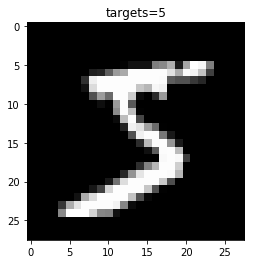

In [2]:
import os 
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#Hyper parameters
EPOCH=1
batch_size=50
LR=0.001
Download_mnist=False

if not(os.path.exists('./mnist')) or os.listdir('./mnist'):
    Download_mnist=True
    
train_data=torchvision.datasets.MNIST(root='./mnist',train=True,transform=torchvision.transforms.ToTensor(),download=Download_mnist)
print(train_data.data[0].size())  #第一筆訓練資料的大小 (60000,28,28)
print(train_data.targets.size())  #60000
plt.imshow(train_data.data[0].numpy(),cmap='gray')
plt.title('targets=%i' % train_data.targets[0])
plt.show()

In [3]:
train_loader=Data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_data=torchvision.datasets.MNIST(root='./mnist',train=False)
test_x=torch.unsqueeze(test_data.data,dim=1).type(torch.FloatTensor)[:2000]/255  #  (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y=test_data.targets[:2000]

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Sequential(
          nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2))
        self.conv2=nn.Sequential(
          nn.Conv2d(16,32,5,1,2),
          nn.ReLU(),
          nn.MaxPool2d(2))
        self.out=nn.Linear(32*7*7,10)
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x)
        x=x.view(x.size(0),-1)
        output=self.out(x)
        return output, x

In [4]:
cnn=CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [5]:
optimizer=torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func=nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):# gives batch data, normalize x when iterate train_loader
        output = cnn(b_x)[0]# cnn output, [1]:x
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           
        loss.backward()               
        optimizer.step()            

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

Epoch:  0 | train loss: 2.3120 | test accuracy: 0.11
Epoch:  0 | train loss: 0.5064 | test accuracy: 0.82
Epoch:  0 | train loss: 0.2951 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2386 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2209 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2639 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0957 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1075 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0828 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0568 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1244 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0496 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0904 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1699 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0739 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0432 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0496 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2722 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0243 | test accuracy